In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [36]:
path = "preprocessed2.csv"
df = pd.read_csv(path, index_col=0)
df.columns.values.tolist().index('rain_sum (mm)')
y = df.iloc[:,df.columns.values.tolist().index('rain_sum (mm)')]
X = df.drop(columns='rain_sum (mm)')

In [53]:
def nn(X,y,hidden,iter,solv,act):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    # Create an instance of the MLPRegressor
    mlp = MLPRegressor(hidden_layer_sizes=(hidden), max_iter=iter, random_state=0,solver=solv,activation=act)

    # Train the model on the training data
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_test)
    y_predtrain = mlp.predict(X_train)

    # Calculate the MSE on the test set
    msetrain = mean_squared_error(y_train, y_predtrain)
    # print('mse train: ',msetrain)
    mse = mean_squared_error(y_test, y_pred)
    # print('mse test: ',mse)
    loss = mlp.best_loss_
    # print("best loss: ", loss)
    return mse

In [61]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create an instance of the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(15), max_iter=1000, random_state=0,solver='adam',activation='relu')

# Train the model on the training data
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
y_predtrain = mlp.predict(X_train)

# Calculate the MSE on the test set
msetrain = mean_squared_error(y_train, y_predtrain)
print('mse train: ',msetrain)
mse = mean_squared_error(y_test, y_pred)
print('mse test: ',mse)
loss = mlp.best_loss_
print("best loss: ", loss)

mse train:  38.33777900271603
mse test:  43.84930174809118
best loss:  19.235804615104566


In [62]:
neuron_list = [1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 100, 200]
mselist = []
for n in neuron_list:
    mselist.append(nn(X,y,n,1000,'adam','relu'))

plt.plot(neuron_list, mselist)
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Squared Error')
plt.show()
print(mselist.index(min(mselist)))
#30,6,5
#mse test:  43.84930174809118, hidden 15

C:\Users\Acer\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


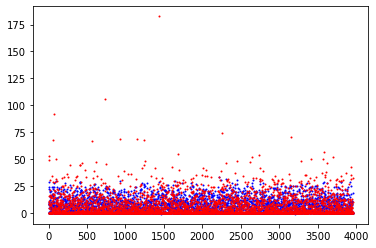

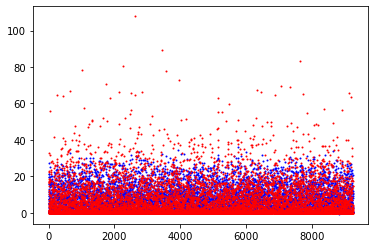

In [40]:
plt.scatter(range(len(y_pred)),y_pred,s=1,c='blue')
plt.scatter(range(len(y_test)),y_test,s=1,c='red')
plt.show()
plt.scatter(range(len(y_predtrain)),y_predtrain,s=1,c='blue')
plt.scatter(range(len(y_train)),y_train,s=1,c='red')
plt.show()